In [2]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

In [23]:
df = pd.read_csv("card_transdata.csv")
print(df.shape)
df.head(20)

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [15]:
print(df.columns)
df.describe()

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns
X = df.drop("fraud", axis=1)
y = df.fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1000000, 7)
(750000, 7)
(250000, 7)


In [6]:
numeric_features = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features (Sex, Has_Cabin)
binary_features = ['repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature


# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features)])


TRAIN METRICS
    Confusion Matrix: 
    [[679614   4738]
 [ 26332  39316]]
    
    AUC: 0.9667704130625829

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    684352
         1.0       0.89      0.60      0.72     65648

    accuracy                           0.96    750000
   macro avg       0.93      0.80      0.85    750000
weighted avg       0.96      0.96      0.95    750000

    
TEST METRICS
    Confusion Matrix: 
    [[226712   1533]
 [  8735  13020]]
    
    AUC: 0.9669636368106326

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228245
         1.0       0.89      0.60      0.72     21755

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000

    


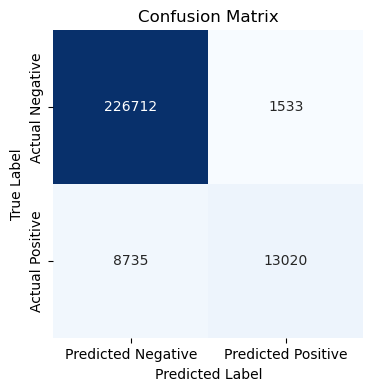

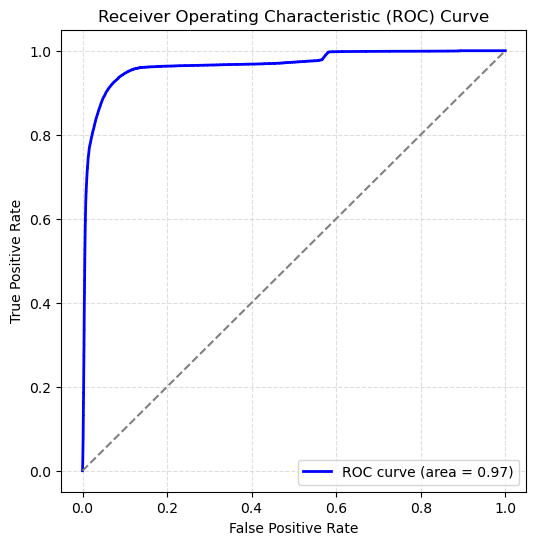

In [7]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[684352      0]
 [     0  65648]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    684352
         1.0       1.00      1.00      1.00     65648

    accuracy                           1.00    750000
   macro avg       1.00      1.00      1.00    750000
weighted avg       1.00      1.00      1.00    750000

    
TEST METRICS
    Confusion Matrix: 
    [[228245      0]
 [     1  21754]]
    
    AUC: 0.9999999965763563

    Classification Report:
                  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228245
         1.0       1.00      1.00      1.00     21755

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000

    


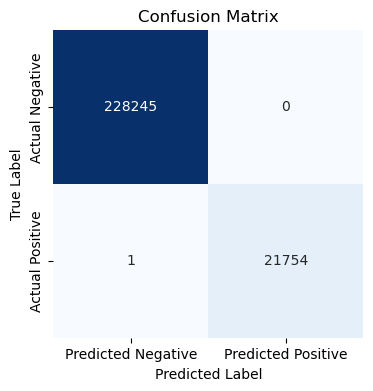

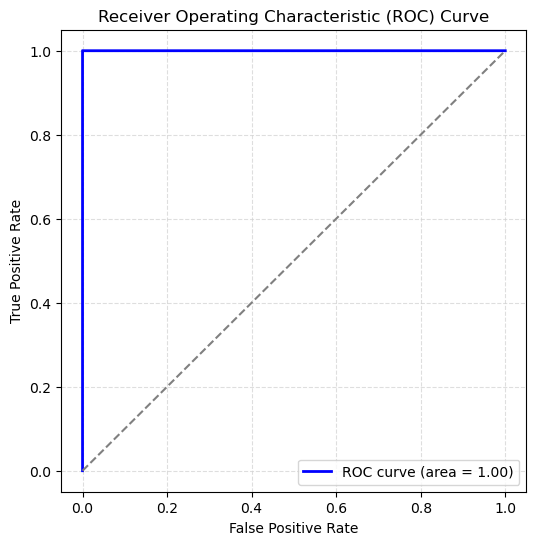

In [8]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[683931    421]
 [   289  65359]]
    
    AUC: 0.9999919341638063

    Classification Report:
                  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    684352
         1.0       0.99      1.00      0.99     65648

    accuracy                           1.00    750000
   macro avg       1.00      1.00      1.00    750000
weighted avg       1.00      1.00      1.00    750000

    
TEST METRICS
    Confusion Matrix: 
    [[227964    281]
 [   192  21563]]
    
    AUC: 0.9999694838553524

    Classification Report:
                  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228245
         1.0       0.99      0.99      0.99     21755

    accuracy                           1.00    250000
   macro avg       0.99      0.99      0.99    250000
weighted avg       1.00      1.00      1.00    250000

    


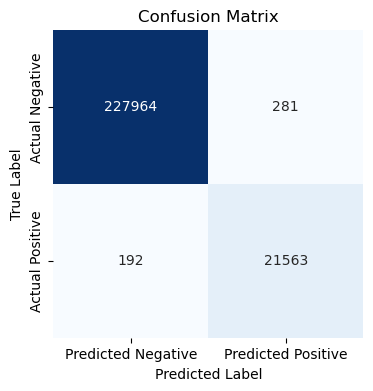

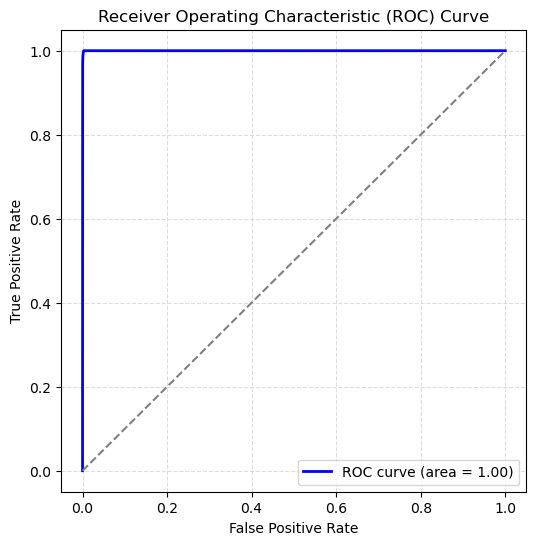

In [9]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[683439    913]
 [     3  65645]]
    
    AUC: 0.9999872294293554

    Classification Report:
                  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    684352
         1.0       0.99      1.00      0.99     65648

    accuracy                           1.00    750000
   macro avg       0.99      1.00      1.00    750000
weighted avg       1.00      1.00      1.00    750000

    
TEST METRICS
    Confusion Matrix: 
    [[227894    351]
 [    17  21738]]
    
    AUC: 0.9999722427080027

    Classification Report:
                  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228245
         1.0       0.98      1.00      0.99     21755

    accuracy                           1.00    250000
   macro avg       0.99      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000

    


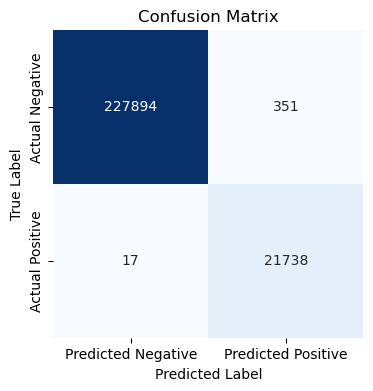

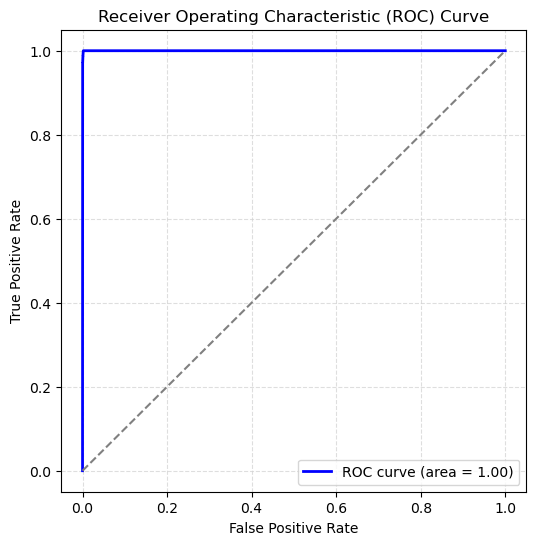

In [21]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [10]:
 # Create a pipeline with a scaler and a logistic regression model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lgbm, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.99997584 0.9999763  0.99998027 0.99997247 0.99997061]
Mean AUC: 1.000


In [11]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [1. 1. 1. 1. 1.]
Mean AUC: 1.000


In [18]:
rf_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_final.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance_from_home',
                                                   'distance_from_last_transaction',
                                                   'ratio_to_median_purchase_price']),
                                                 ('binary',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  ['repeat_retailer',
                                                   'used_chip',
                                                   'used_pin_number',
                                                   'online_order'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [12]:
 # Save off my models
import pickle

# Model
pickle.dump(rf, open("credit_model_pipeline.h5", 'wb'))

In [25]:
 # Save off my models
import pickle

# Model
pickle.dump(rf_final, open("credit_model_pipeline.pkl", 'wb'))

In [26]:
# Load model
model = pickle.load(open("credit_model_pipeline.pkl", 'rb'))

# Create input DataFrame
df = pd.DataFrame()
df["distance_from_home"] = [2.131956]
df["distance_from_last_transaction"] = [56.372401]
df["ratio_to_median_purchase_price"] = [6.358667]
df["repeat_retailer"] = [1.0]
df["used_chip"] = [0.0]
df["used_pin_number"] = [0.0]
df["online_order"] = [1.0]

# Reorder columns (just to be safe)
df = df.loc[:, [
    'distance_from_home', 
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price', 
    'repeat_retailer', 
    'used_chip',
    'used_pin_number', 
    'online_order'
]]

# Make prediction
preds = model.predict_proba(df)
print(preds)

[[0. 1.]]
